## Write your headlines first
## practice your two line pitch
## then write subheaders & sketch out story

In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pysal as ps
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
driver = webdriver.Chrome()

%matplotlib inline

## MEGIS  
(#from here: http://www.maine.gov/megis/catalog/) has a shapefile of Conserved Lands in Maine. Let's look at it.


Data Dictionary info that's relevant:


    ACQ_YEAR: acquisition year
    CALC_AC : calculated acreage
    DESIGNATIO : designation (easement, sanctuary, etc.)
    HOLD1_NAME : manager
    HOLD1_TYPE : state/private
    PARCEL_NAM : name of the preserve/parcel/easement
    geometry : polygon = shape of holding
 

In [5]:
#from here: http://www.maine.gov/megis/catalog/

conservation_lands = gpd.read_file('/Users/kaitlincough/Documents/data_studio/data_studio_projects/shapefiles/conserved_landss/conserved_lands.shp')

In [6]:
pd.set_option("display.max_columns", 100)
conservation_lands.head(100)

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,HOLD1_NAME,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry
0,None,,,26.857197,787,,,,,,,,None,,,,,,,,,,,,Contact landowner for additional information,,,,0.000,"POLYGON ((463512.4724000003 5027491.558599999,..."
1,None,1965,,8.314696,1,Fee,,,Nature Preserve / Reserve / Sanctuary,,Ellen Jackson,,None,2,The Nature Conservancy,Private,,,,,,MEFO File Survey; CAP,,La Verna Preserve,"Allowed for general uses, contact owner for de...",Seeks to protect ecosystem or specific wildlife,,,0.000,"POLYGON ((462543.8321000002 4861397.2675, 4625..."
2,None,,,52.293330,2,Fee,,,,,,,None,4,Maine Department of Transportation,State,,,,,,Roadside Rest Area,ASH HILL,ASH HILL SCENIC AREA,Contact landowner for additional information,,,,52.292,"POLYGON ((542053.9376999997 5089059.000499999,..."
3,1993-12-27,1993,,247.049757,3,Fee,,,Nature Preserve / Reserve / Sanctuary,,Ellen Jackson,,None,1,The Nature Conservancy,Private,,,,,,MEFO File Survey,,Saco Heath Preserve,Contact landowner for additional information,Seeks to protect ecosystem or specific wildlife,,,0.000,"POLYGON ((381291.2644999996 4824393.9134, 3813..."
4,None,2001,,1.816991,4,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,1.817,"POLYGON ((492307.3439999996 5140590.4999, 4923..."
5,None,2001,,0.084249,5,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.085,"POLYGON ((531716.8749000002 5134688.4998, 5317..."
6,1989-09-06,1989,,30.675615,6,Easement,,,Conservation Easement,,Chris Cabot,"put-copies selected features, coordinate infor...",2009-07-16,3,Maine Department of Inland Fisheries and Wildlife,State,,,0013001,,,Digitized boundaries from georeferenced 1973 s...,McBurnie Property,Conant Brook,Contact landowner for additional information,,,,37.000,"POLYGON ((583480.4373000003 5176787.9998, 5834..."
7,None,2001,,0.025927,7,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.027,"POLYGON ((479938.0630000001 5139478.500600001,..."
8,None,2001,,0.063186,8,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.065,"POLYGON ((480570.1564999996 5138042.000600001,..."
9,None,2001,,0.535307,9,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.535,"POLYGON ((480686.8128000004 5139087.500299999,..."


In [7]:
conservation_lands[conservation_lands['HOLD1_TYPE'].str.contains('Other')]

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,HOLD1_NAME,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry
3063,None,,,5.841110,3083,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,"Kennebunk, Kennebunkport and Wells Water Distr...",Other,,,,,,Data provided by Interest1,Turcotte,Turcotte,Contact landowner for additional information,Parcel designated as buffer for water supply,,,0.0,"POLYGON ((372985.6128000002 4803905.371400001,..."
3064,None,,,92.782681,3084,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,"Kennebunk, Kennebunkport and Wells Water Distr...",Other,,,,,,Data provided by Interest1,Turcotte,Turcotte,Contact landowner for additional information,Parcel designated as buffer for water supply,,,0.0,"POLYGON ((373681.1300999997 4802663.577, 37368..."
3065,None,,,27.585567,3085,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,"Kennebunk, Kennebunkport and Wells Water Distr...",Other,,,,,,Data provided by Interest1,Merriland River,Merriland River,Contact landowner for additional information,Parcel designated as buffer for water supply,,,0.0,"POLYGON ((372771.0824999996 4800846.944499999,..."
3066,None,,,0.356100,3086,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,"Kennebunk, Kennebunkport and Wells Water Distr...",Other,,,,,,Data provided by Interest1,Merriland River,Merriland River,Contact landowner for additional information,Parcel designated as buffer for water supply,,,0.0,"POLYGON ((372003.8054999998 4800814.624, 37197..."
3067,None,,,63.907686,3087,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,"Kennebunk, Kennebunkport and Wells Water Distr...",Other,,,,,,Data provided by Interest1,Sandy Lane South,Sandy Lane South,Contact landowner for additional information,Parcel designated as buffer for water supply,,,0.0,"POLYGON ((371973.7808999997 4803786.729900001,..."
3068,None,,,24.985868,3088,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,"Kennebunk, Kennebunkport and Wells Water Distr...",Other,,,,,,Data provided by Interest1,Sandy Lane North,Sandy Lane North,Contact landowner for additional information,Parcel designated as buffer for water supply,,,0.0,"POLYGON ((371895.9897999996 4804137.941299999,..."
3069,None,,,69.106582,3089,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,"Kennebunk, Kennebunkport and Wells Water Distr...",Other,,,,,,Data provided by Interest1,Harriseckett West,Harriseckett West,Contact landowner for additional information,Parcel designated as buffer for water supply,,,0.0,"POLYGON ((372627.835 4803061.7323, 372652.2577..."
3070,None,,,16.903598,3090,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,"Kennebunk, Kennebunkport and Wells Water Distr...",Other,,,,,,Data provided by Interest1,Harriseckett East,Harriseckett East,Contact landowner for additional information,Parcel designated as buffer for water supply,,,0.0,"POLYGON ((373655.1310999999 4801990.7092, 3736..."
3071,None,,,176.696030,3091,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,"Kennebunk, Kennebunkport and Wells Water Distr...",Other,,,,,,Data provided by Interest1,Jefferd's Lot,Jefferd's Lot,Contact landowner for additional information,Parcel designated as buffer for water supply,,,0.0,"POLYGON ((372693.7827000003 4802887.519400001,..."
3072,None,,,0.557484,3092,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,"Kennebunk, Kennebunkport and Wells Water Distr...",Other,,,,,,Data provided by Interest1,Schiavi,Schiavi,Contact landowner for additional information,Parcel designated as b

In [8]:
conservation_trusts.shape()

NameError: name 'conservation_trusts' is not defined

In [143]:
#what're the columns?
conservation_lands.columns

Index(['ACQ_DATE', 'ACQ_YEAR', 'BPL_ID', 'CALC_AC', 'CL_UNIQUEI', 'CONS1_TYPE',
       'CONS2_TYPE', 'DEPT_ID', 'DESIGNATIO', 'ECO_RESERV', 'EDITOR',
       'FMPROCSS', 'FMUPDDAT', 'GAP_STATUS', 'HOLD1_NAME', 'HOLD1_TYPE',
       'HOLD2_NAME', 'HOLD2_TYPE', 'IFW_ID', 'IUCN_STATU', 'LMF_ID', 'NOTE_',
       'PARCEL_NAM', 'PROJECT', 'PUB_ACCESS', 'PURPOSE1', 'PURPOSE2', 'REVIEW',
       'RPT_AC', 'geometry'],
      dtype='object')

In [28]:
#what are the designations?
conservation_lands['DESIGNATIO'].value_counts().head()

                                  3761
Miscellaneous Municipal Lands     1568
National Wildlife Refuge          1251
State Wildlife Management Area     917
Coastal Island                     566
Name: DESIGNATIO, dtype: int64

## Why are there some missing? Contact MEGIS!

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


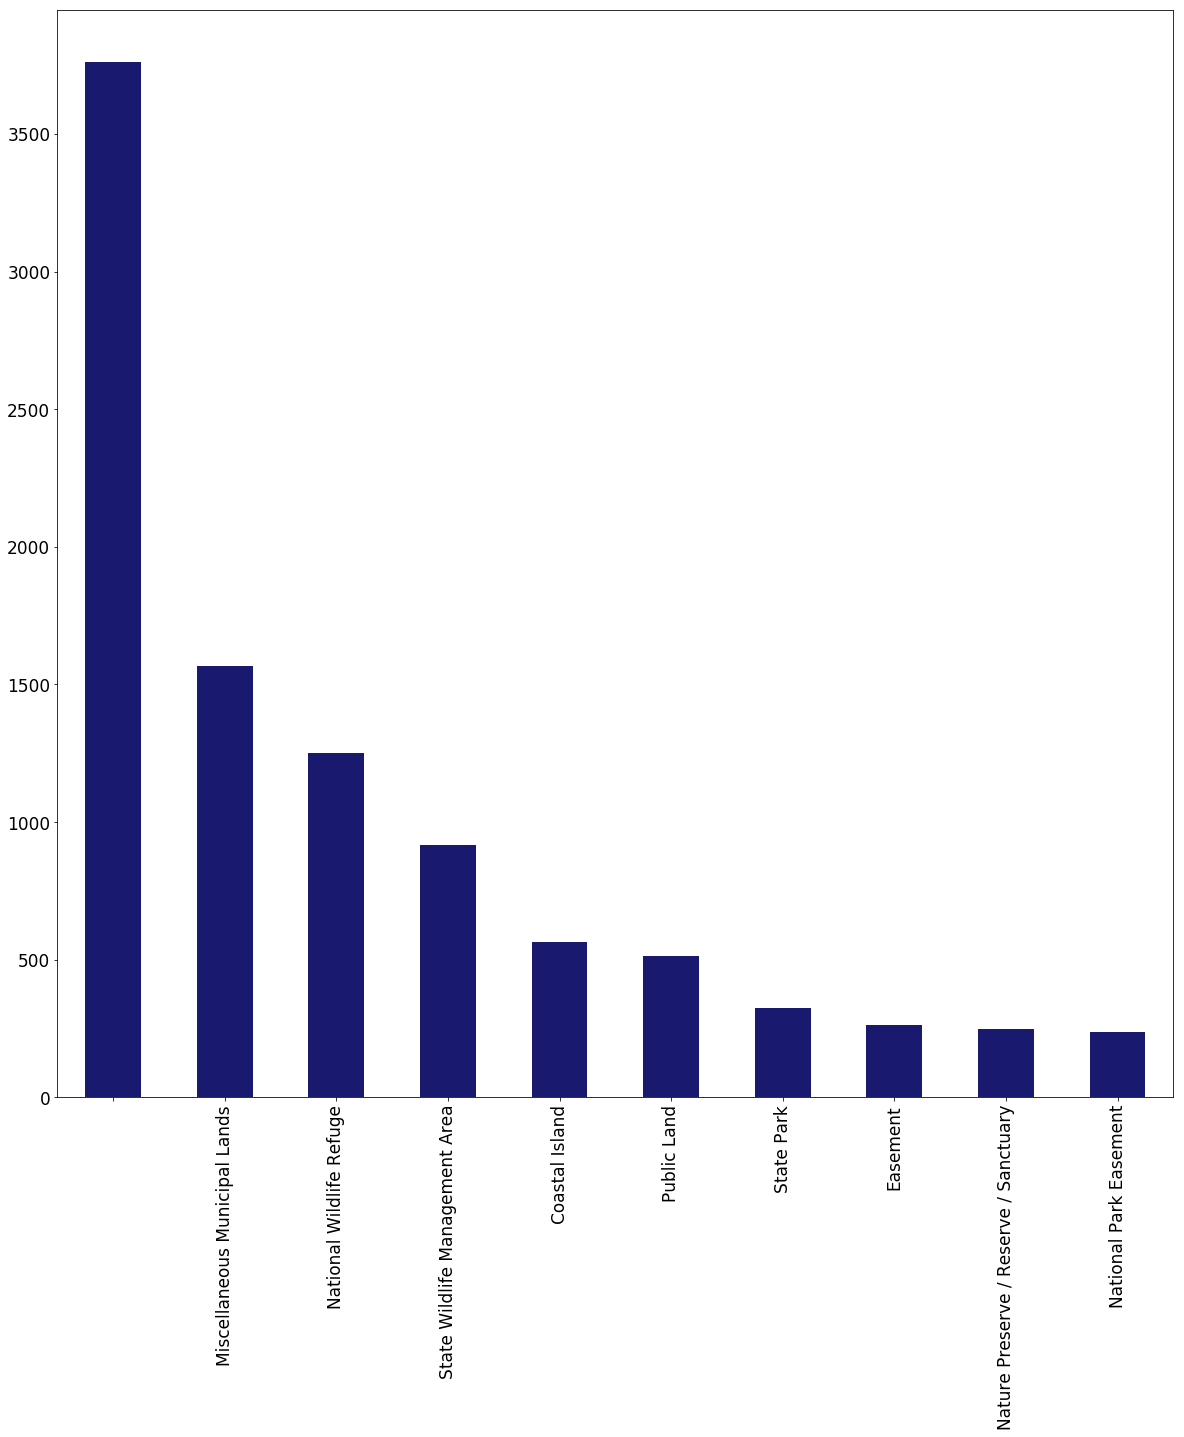

In [56]:
#let's plot the designation types
counts = conservation_lands['DESIGNATIO'].value_counts().head(10)
colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]

ax = counts.plot(kind='bar', fontsize=17,colors=colors, figsize=(20,20))
fig = ax.get_figure()
fig.savefig('preserve_types_bar.pdf')

In [51]:
# counts = conservation_lands['DESIGNATIO'].value_counts().head(10)
# plt.axis('equal')
# colors = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
# counts.plot(kind='pie', fontsize=17,colors=colors, figsize=(20,20))
# # plt.legend(labels=group_names,loc="DESIGNATIO")
# plt.show()
# plt.savefig('preserve_types.png')

# # explode = (0, 0, 0,0.1,0.1,0.2,0.3,0.4,0.6)

# # counts.plot(kind='pie', fontsize=17,colors=colors,explode=explode)


In [29]:

# ax = conservation_lands['DESIGNATIO'].value_counts().head(10).plot.pie(figsize=(20,10))
# ax.plot()
# ax.savefig('preserve_types_pie.pdf')

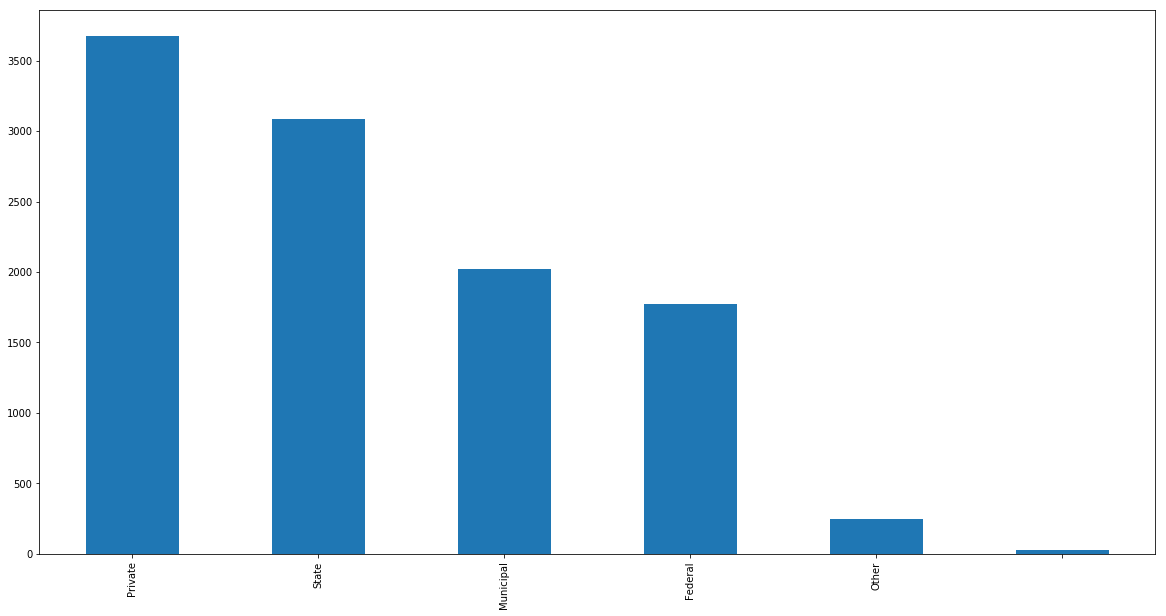

In [53]:
#are most of the holdings federal, state or private?
entity = conservation_lands['HOLD1_TYPE'].value_counts()
ax = entity.plot(kind='bar', figsize=(20,10))
fig = ax.get_figure()
fig.savefig('entity_bar.pdf')

In [149]:
conservation_lands['CONS1_TYPE'].value_counts()

Fee                              8297
Easement                         2212
Management Transfer Agreement     245
Public Access Easement             41
                                   20
Restricted                          8
Lease                               4
Third Party Easement                2
Easement Enforcer                   1
Other                               1
Name: CONS1_TYPE, dtype: int64

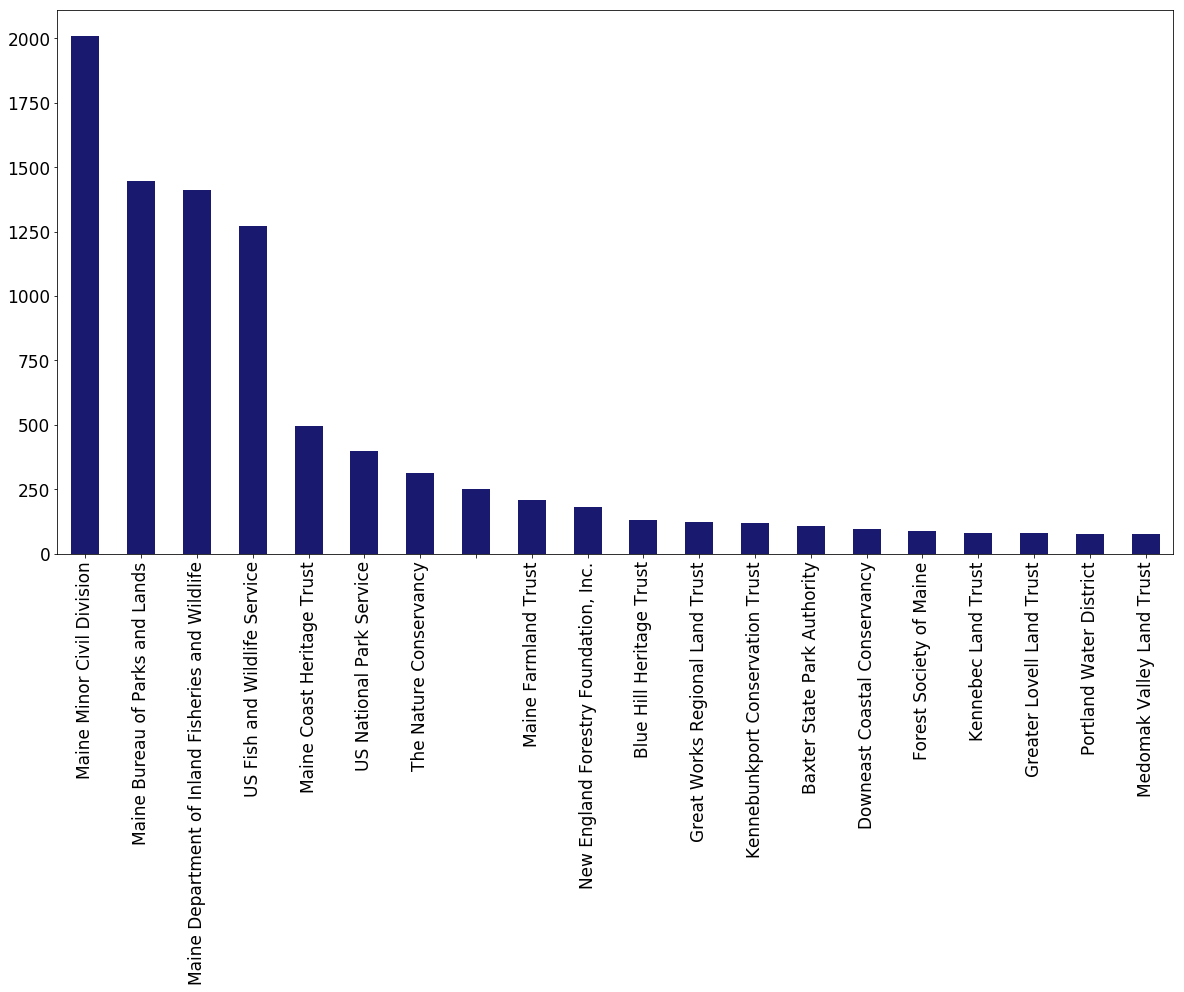

In [54]:
#which organizations manage the most parcels?
holders = conservation_lands['HOLD1_NAME'].value_counts().head(20)
color = ['#191970','#001CF0','#0038E2','#0055D4','#0071C6','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80',]
ax = holders.plot(kind='bar', fontsize=17, color=color, figsize=(20,10))
fig = ax.get_figure()
fig.savefig('land_holder_bar.pdf')

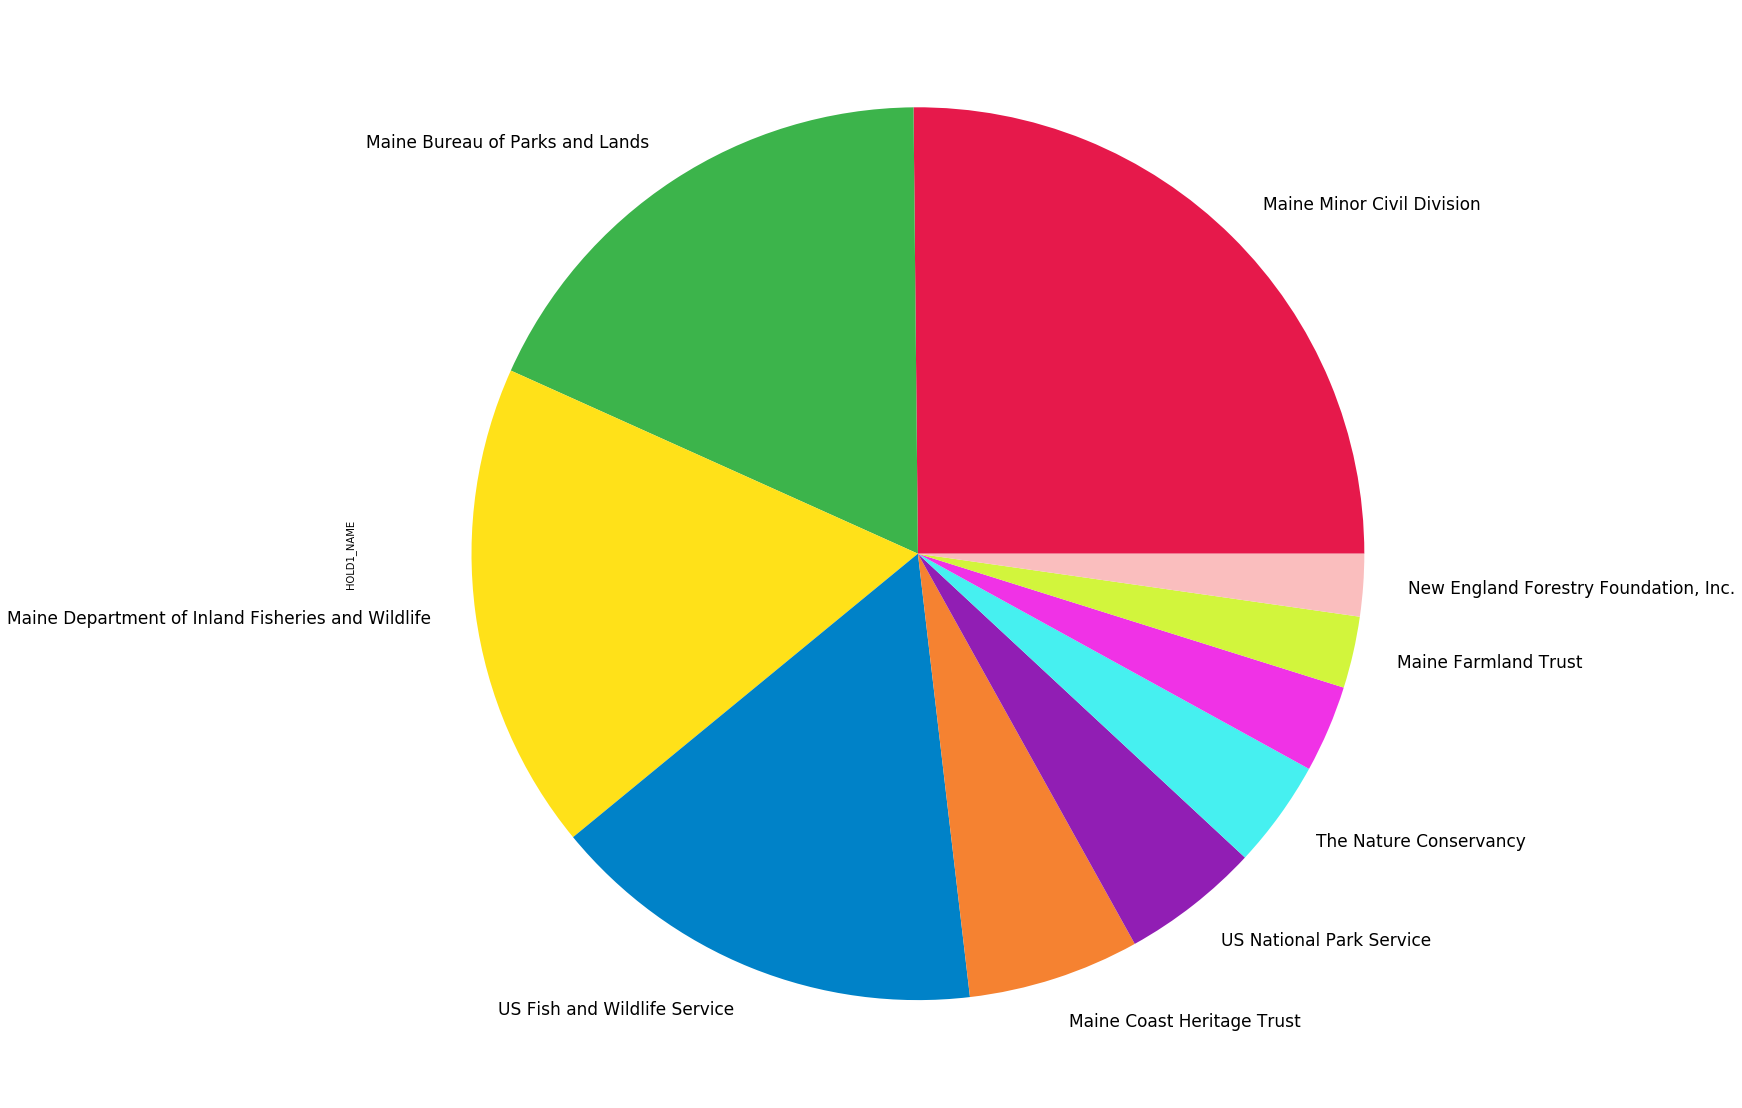

In [61]:
holders = conservation_lands['HOLD1_NAME'].value_counts().head(10)
plt.axis('equal')
colors = ['#e6194b','#3cb44b','#ffe119','#0082c8','#f58231','#911eb4','#46f0f0','#f032e6','#d2f53c','#fabebe',"#008080",'#e6beff','#aa6e28','#fffac8','#800000','#aaffc3','#808000','#ffd8b1','#000080','#808080','#FFFFFF','#000000']
ax = holders.plot(kind='pie', fontsize=17,colors=colors, figsize=(20,20))
# plt.legend(labels=group_names,loc="DESIGNATIO")
fig = ax.get_figure()
fig.savefig('land_holder_pie2.pdf')


AttributeError: 'AxesSubplot' object has no attribute 'savefig'

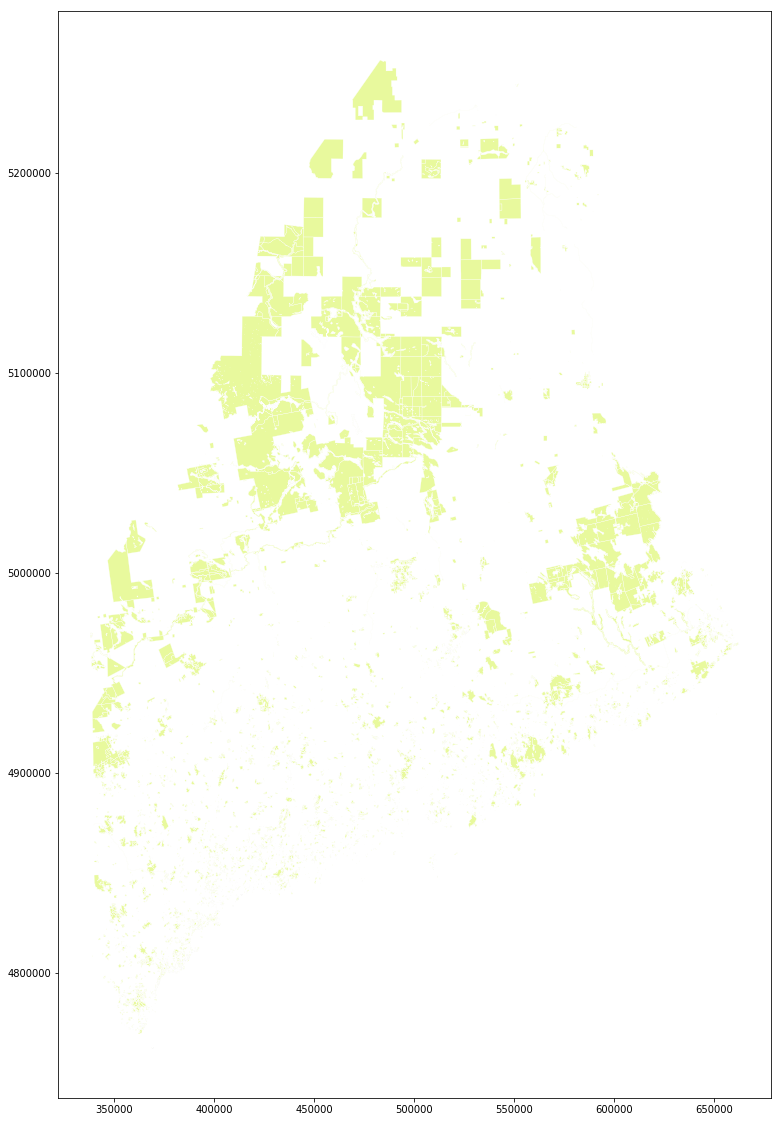

In [62]:
#let's map all of them using the shapefile
ax = conservation_lands.plot(color='red', linewidth=0.25, edgecolor='white', figsize=(20,20))
ax.plot()
ax.savefig('conservation_lands.pdf')



### The most comprehensive information on all land trusts in Maine was here: http://www.mltn.org/trust_guide/.
It's a guide maintained by Maine Coast Heritage Trust and the Maine Land Trust Network (part of MCHT). It has information on the trust, the contact info, and the number of parcels they manage. Scrape the info from this site.

In [118]:
response = requests.get('http://www.mltn.org/trust_guide/')
doc = BeautifulSoup(response.text, 'html.parser')


#make an empty list to store all of the information in
all_trusts_list = []

#start at the top. all the info is in the class trustInfo
trust_info = doc.find_all('div', {'class':'trustInfo'})


for each_trust in trust_info:
    #create a dictionary where you will store things
    trust_dict = {}
    
    #find the name in the h2 tag
    name = each_trust.find('h2')
    #if there's a name, add a key:value pair to the dictionary
    #with the key name, and the value = to the text of 
    #what's in the h2 tag
    if name:
        trust_dict['name'] = name.text
        
    #find the homepage
    homepage = each_trust.find('a')
    #if there's a homepage, add a key: homepage pair to the dictionary
    if homepage:
        #with the value equal to the href inside the homepage
        trust_dict['homepage'] = homepage['href']
        
    qf_block = each_trust.find('div',{'class':'quickfacts'})
    
    if qf_block:
        
        quickfacts = qf_block.find_all('li')
#         print(quickfacts)
        
    else:
            
        continue
        
    for each_li_tag in quickfacts:
        
        if "Number of Staff" in each_li_tag.text:
            trust_dict['num_staff'] = each_li_tag.text
        if "Membership" in each_li_tag.text:
            trust_dict['membership'] = each_li_tag.text
        if "Number of Parcels" in each_li_tag.text:
            trust_dict['num_parcels'] = each_li_tag.text
        if "Acres owned" in each_li_tag.text:
            trust_dict['acres_owned'] = each_li_tag.text
        if "Acres under Conservation Easement" in each_li_tag.text:
            trust_dict['acres_easement'] = each_li_tag.text
        if "Founded" in each_li_tag.text:
            trust_dict['founded'] = each_li_tag.text
            

    all_trusts_list.append(trust_dict)

    
import pandas as pd
#convert it to a df
df = pd.DataFrame(all_trusts_list)
df.to_csv("maine_land_trust_info.csv", index=False)
df.tail(50)


,acres_easement,acres_owned,founded,homepage,membership,name,num_parcels,num_staff
17,"Acres under Conservation Easement: 1,808","Acres owned: 1,808",Founded: 1984,http://www.fsmaine.org,Membership: NA,Forest Society of Maine,Number of Parcels: 38,Number of Staff: 8.00
18,Acres under Conservation Easement: 1458,Acres owned: 1458,Founded: 1990,http://www.FSHT.org,Membership: 200,"Francis Small Heritage Trust, Inc.",Number of Parcels: 7,Number of Staff: 0.00
19,Acres under Conservation Easement: 443,Acres owned: 443,Founded: 1977,http://www.freeportconservationtrust.org,Membership: 250,Freeport Conservation Trust,Number of Parcels: 29,Number of Staff: 1.00
20,Acres under Conservation Easement: 3545,Acres owned: 3545,Founded: 1987,http://www.frenchmanbay.org,Membership: 866,Frenchman Bay Conservancy,Number of Parcels: 30,Number of Staff: 3.00
21,NaN,NaN,NaN,http://friendsofsearsisland.org/,NaN,Friends of Sears Island,NaN,NaN
22,Acres under Conservation Easement: 10,Acres owned: 10,Founded: 1992,http://home.maine.rr.com/gorhamtrails/,Membership: 142,"Gorham Trails, Inc.",Number of Parcels: 12,Number of Staff: 0.00
23,NaN,Acres owned: 4,Founded: 2006,mailto:grtdia@aol.com w/GDILP in subject line,NaN,Great Diamond Island Land Preserve,Number of Parcels: 2,Number of Staff: 0.00
24,"Acres under Conservation Easement: 4,595","Acres owned: 4,595",Founded: 1993,http://www.greatpondtrust.org,Membership: 400,Great Pond Mountain Conservation Trust,Number of Parcels: 2,Number of Staff: 2.00
25,Acres under Conservation Easement: 382,Acres owned: 382,Founded: 1983,http://www.hhltmaine.org,Membership: 600,Harpswell Heritage Land Trust,Number of Parcels: 23,Number of Staff: 2.00
26,Acres under Conservation Easement:,NaN,Founded: 2004,mailto:johnbryant901@gmail.com,Membership: 15,Holden Land Trust,Number of Parcels: 1,Number of Staff: 0.00


In [116]:
len(df)

67

In [4]:
#I cleaned the file a little in excel
#because I find that easier sometimes
#so let's re-import it

df = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/maine_conservation_lands/maine_land_trust_info.csv')
df.head(50)

,name,homepage,founded,acres_owned,acres_under_easement,num_parcels,num_staff,membership
0,Bangor Land Trust,http://www.bangorlandtrust.org,2001.0,812,812,3,1.0,398
1,Belgrade Regional Conservation Alliance,http://www.belgradelakes.org,1988.0,"1,874","1,874",14,3.0,1200
2,Blue Hill Heritage Trust,http://bluehillheritagetrust.org,1985.0,"3,288","3,288",84,4.0,550
3,Boothbay Region Land Trust,http://www.bbrlt.org,1980.0,"1,391","1,391",13,5.0,980 households
4,Brewer Land Trust,mailto:ljohns@brewerme.org,2006.0,4.2,4.2,4,0.0,NaN
5,Brunswick-Topsham Land Trust,http://www.btlt.org,1985.0,641.1,641.1,25 properties,3.0,1000
6,Cape Elizabeth Land Trust,http://www.capelandtrust.org,1985.0,232,232,14,2.0,600
7,"Chebeague and Cumberland Land Trust, Inc.",http://www.ccltmaine.org,1987.0,81,81,15,1.0,250
8,Chewonki Foundation,http://www.chewonki.org,1962.0,NaN,,2,70.0,12000 alumni
9,Coastal Mountains Land Trust,http://www.coastalmountains.org/,1986.0,"4,870","4,870",66,5.0,1700


In [5]:
#make sure it's still the same leng
len(df)

67

In [ ]:
#so the next step is to join the geodataframe conservation_lands with the df with all the trust info
#on the name column
#then you can create a nice map with all that info

In [ ]:
#first thing to do is reset the index on the 
#spatial dataframe so 

In [7]:
conservation_lands.rename(columns={'HOLD1_NAME': 'name'}, inplace=True)
conservation_lands.head()

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,name,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry
0,None,,,26.857197,787,,,,,,,,None,,,,,,,,,,,,Contact landowner for additional information,,,,0.000,"POLYGON ((463512.4724000003 5027491.558599999,..."
1,None,1965,,8.314696,1,Fee,,,Nature Preserve / Reserve / Sanctuary,,Ellen Jackson,,None,2,The Nature Conservancy,Private,,,,,,MEFO File Survey; CAP,,La Verna Preserve,"Allowed for general uses, contact owner for de...",Seeks to protect ecosystem or specific wildlife,,,0.000,"POLYGON ((462543.8321000002 4861397.2675, 4625..."
2,None,,,52.293330,2,Fee,,,,,,,None,4,Maine Department of Transportation,State,,,,,,Roadside Rest Area,ASH HILL,ASH HILL SCENIC AREA,Contact landowner for additional information,,,,52.292,"POLYGON ((542053.9376999997 5089059.000499999,..."
3,1993-12-27,1993,,247.049757,3,Fee,,,Nature Preserve / Reserve / Sanctuary,,Ellen Jackson,,None,1,The Nature Conservancy,Private,,,,,,MEFO File Survey,,Saco Heath Preserve,Contact landowner for additional information,Seeks to protect ecosystem or specific wildlife,,,0.000,"POLYGON ((381291.2644999996 4824393.9134, 3813..."
4,None,2001,,1.816991,4,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,1.817,"POLYGON ((492307.3439999996 5140590.4999, 4923..."


In [8]:
# continental.merge(obesity, left_on='NAME', right_on='statename')

joined = conservation_lands.merge(df, left_on='name', right_on='name')
joined.head(100)

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,name,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry,homepage,founded,acres_owned,acres_under_easement,num_parcels,num_staff,membership
0,None,2001,,1.816991,4,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,1.817,"POLYGON ((492307.3439999996 5140590.4999, 4923...",http://www.newenglandforestry.org,1944.0,"27,147","27,147",145,15.0,700
1,None,2001,,0.084249,5,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.085,"POLYGON ((531716.8749000002 5134688.4998, 5317...",http://www.newenglandforestry.org,1944.0,"27,147","27,147",145,15.0,700
2,None,2001,,0.025927,7,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.027,"POLYGON ((479938.0630000001 5139478.500600001,...",http://www.newenglandforestry.org,1944.0,"27,147","27,147",145,15.0,700
3,None,2001,,0.063186,8,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.065,"POLYGON ((480570.1564999996 5138042.000600001,...",http://www.newenglandforestry.org,1944.0,"27,147","27,147",145,15.0,700
4,None,2001,,0.535307,9,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,0.535,"POLYGON ((480686.8128000004 5139087.500299999,...",http://www.newenglandforestry.org,1944.0,"27,147","27,147",145,15.0,700
5,None,2001,,3.298554,10,Easement,,,,,,,None,3,"New England Forestry Foundation, Inc.",Private,,,,,,,PINGREE EASEMENT,PINGREE EASEMENT,Contact landowner for additional information,,,,3.298,"POLYGON ((482287.3123000003 5135866.000499999,...",http://www.newenglandforestry.org,1944.0,"27,147","27,147",145,15.0,700
6,None,2001,,5003.422326,18,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2015-01-08,3,"New England Forestry Foundation, Inc.",Private,,,,,,Changed geometry with new data from NEFF - elj...,Pingree,Pingree,Contact landowner for additional information,,,y,5003.313,"POLYGON ((349535.2817000002 4963496.9998, 3494...",http://www.newenglandforestry.org,1944.0,"27,147","27,147",145,15.0,700
7,None,2001,,40.246433,22,Easement,Easement Enforcer,,Easement,,Ellen Jackson,copy-duplicates features and INFO files to a n...,2013-11-04,3,"New England Forestry Foundation, Inc.",Private,New Hampshire Complex Systems Research Center-...,Private,,,,shapefile recd from Hold2,Pingree,Pingree,Contact landowner for additional information,,,y,40.268,"POLYGON ((347988.8904999997 4973304.249700001,...",http://www.newenglandforestry.org,1944.0,"27,147","27,147",145,15.0,700
8,None,2001,,132.514116,23,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2015-01-08,3,"New England Forestry Foundation, Inc.",Private,,,,,,Changed geometry with new data from NEFF - elj...,Pingree,Pingree,Contact landowner for additional information,,,y,132.513,"POLYGON ((348243.2498000003 4971635.0002, 3481...",http://www.newenglandforestry.org,1944.0,"27,147","27,147",145,15.0,700
9,None,2001,,4.215877,66,Easement,Easement Enforcer,,Easement,,Ellen Jackson,copy-duplicates features and INFO files to a n...,2013-11-04,3,"New England Forestry Foundation, Inc.",Private,New Hampshire Complex Systems Research Center-...,Private,,,,shapefile recd from Hold2,Pingree,Pingree,Contact landowner for additional information,,,y,4.216,"POLYGON ((346299.3443999998 4973376.499600001,...",http://www.newenglandforestry.org,1944.0,"27,147","27,147",14

In [101]:
joined.shape

(2274, 37)

In [ ]:
#then color it by the name of the trust

In [78]:
joined['name'].value_counts().head()

Maine Coast Heritage Trust               496
Maine Farmland Trust                     207
New England Forestry Foundation, Inc.    180
Blue Hill Heritage Trust                 130
Kennebunkport Conservation Trust         121
Name: name, dtype: int64

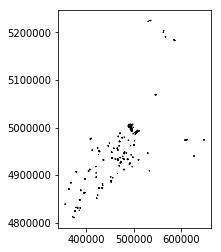

In [86]:
mft = joined[joined['name'] =='Maine Farmland Trust']
mft['geometry'].plot()

In [20]:
mcht = joined[joined['name']=='Maine Coast Heritage Trust']
mcht.head(496)

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,name,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry,homepage,founded,acres_owned,acres_under_easement,num_parcels,num_staff,membership
269,None,,63-107,0.174652,85,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-05-10,2,Maine Coast Heritage Trust,Private,,,,,,Verified by SubmergedLands-BPL-DKW. Updated at...,,,Contact landowner for additional information,,,Y,0.175,"POLYGON ((510497.5313999997 4880559.5001, 5105...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
270,None,,59-657,0.064843,2511,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-10-04,2,Maine Coast Heritage Trust,Private,,,,,,Copied from VerifiedIsl boundaries. Verified b...,,Unnamed Island,Contact landowner for additional information,,,Y,0.065,"POLYGON ((516810.4687999999 4907811.5002, 5168...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
271,None,,63-084,0.190661,2512,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-05-10,2,Maine Coast Heritage Trust,Private,,,,,,Copied from VerifiedIsl boundaries. Verified b...,Part of Big Smith Island,Big Smith Island,Contact landowner for additional information,,,Y,0.191,"POLYGON ((515461.1870999997 4882321.0001, 5154...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
272,None,,63-099,0.290270,2513,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-05-10,2,Maine Coast Heritage Trust,Private,,,,,,Copied from VerifiedIsl boundaries. Verified b...,,,Contact landowner for additional information,,,Y,0.290,"POLYGON ((515202.3750999998 4881139.4999, 5152...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
273,None,,,0.758037,3281,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2015-02-04,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Little Gaffert LLC CE,Contact landowner for additional information,,,,0.000,"POLYGON ((518347.8441000003 4913865.431399999,...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
274,None,,,1.669131,3282,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2015-02-04,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Little Gaffert LLC CE,Contact landowner for additional information,,,,0.000,"POLYGON ((518345.1366999997 4914073.903200001,...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
275,None,,,3.031869,3283,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Wood Island,Contact landowner for additional information,,,,0.000,"POLYGON ((521368.1875 4919661, 521363.40629999...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
276,None,,,2.862561,3284,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Hermit Island,Contact landowner for additional information,,,,0.000,"POLYGON ((521197.1875 4919417.5, 521186.218799...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
277,None,,,7.167018,3287,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,2,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Ram Island,Contact landowner for additional information,,,,0.000,"POLYGON ((515754.9687999999 4912734, 515741.75...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
278,None,,,110.006050,3288,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO file

In [24]:
pd.set_option("display.max_rows", 100)
mcht.head(500)

,ACQ_DATE,ACQ_YEAR,BPL_ID,CALC_AC,CL_UNIQUEI,CONS1_TYPE,CONS2_TYPE,DEPT_ID,DESIGNATIO,ECO_RESERV,EDITOR,FMPROCSS,FMUPDDAT,GAP_STATUS,name,HOLD1_TYPE,HOLD2_NAME,HOLD2_TYPE,IFW_ID,IUCN_STATU,LMF_ID,NOTE_,PARCEL_NAM,PROJECT,PUB_ACCESS,PURPOSE1,PURPOSE2,REVIEW,RPT_AC,geometry,homepage,founded,acres_owned,acres_under_easement,num_parcels,num_staff,membership
269,None,,63-107,0.174652,85,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-05-10,2,Maine Coast Heritage Trust,Private,,,,,,Verified by SubmergedLands-BPL-DKW. Updated at...,,,Contact landowner for additional information,,,Y,0.175,"POLYGON ((510497.5313999997 4880559.5001, 5105...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
270,None,,59-657,0.064843,2511,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-10-04,2,Maine Coast Heritage Trust,Private,,,,,,Copied from VerifiedIsl boundaries. Verified b...,,Unnamed Island,Contact landowner for additional information,,,Y,0.065,"POLYGON ((516810.4687999999 4907811.5002, 5168...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
271,None,,63-084,0.190661,2512,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-05-10,2,Maine Coast Heritage Trust,Private,,,,,,Copied from VerifiedIsl boundaries. Verified b...,Part of Big Smith Island,Big Smith Island,Contact landowner for additional information,,,Y,0.191,"POLYGON ((515461.1870999997 4882321.0001, 5154...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
272,None,,63-099,0.290270,2513,Fee,,,Coastal Island,,Devon Witherell,"put-copies selected features, coordinate infor...",2010-05-10,2,Maine Coast Heritage Trust,Private,,,,,,Copied from VerifiedIsl boundaries. Verified b...,,,Contact landowner for additional information,,,Y,0.290,"POLYGON ((515202.3750999998 4881139.4999, 5152...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
273,None,,,0.758037,3281,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2015-02-04,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Little Gaffert LLC CE,Contact landowner for additional information,,,,0.000,"POLYGON ((518347.8441000003 4913865.431399999,...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
274,None,,,1.669131,3282,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2015-02-04,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Little Gaffert LLC CE,Contact landowner for additional information,,,,0.000,"POLYGON ((518345.1366999997 4914073.903200001,...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
275,None,,,3.031869,3283,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Wood Island,Contact landowner for additional information,,,,0.000,"POLYGON ((521368.1875 4919661, 521363.40629999...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
276,None,,,2.862561,3284,Easement,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,3,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Hermit Island,Contact landowner for additional information,,,,0.000,"POLYGON ((521197.1875 4919417.5, 521186.218799...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
277,None,,,7.167018,3287,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO files to a n...,2013-03-18,2,Maine Coast Heritage Trust,Private,,,,,,Data provided by Blue Hill Land Trust,,Ram Island,Contact landowner for additional information,,,,0.000,"POLYGON ((515754.9687999999 4912734, 515741.75...",http://www.mcht.org,1970.0,"12,118.32","12,118.32",281,45.0,3700
278,None,,,110.006050,3288,Fee,,,,,Justin Schlawin,copy-duplicates features and INFO file

In [26]:
mcht.to_csv("mcht_only_from_joined_dataset.csv", index=False)


In [19]:
mcht['PARCEL_NAM'].describe()

count     496
unique    360
top          
freq       30
Name: PARCEL_NAM, dtype: object

In [37]:
mcht['CALC_AC'].describe()

count     496.000000
mean       53.702957
std       132.946417
min         0.015425
25%         3.841893
50%        17.715617
75%        50.719974
max      1959.752561
Name: CALC_AC, dtype: float64

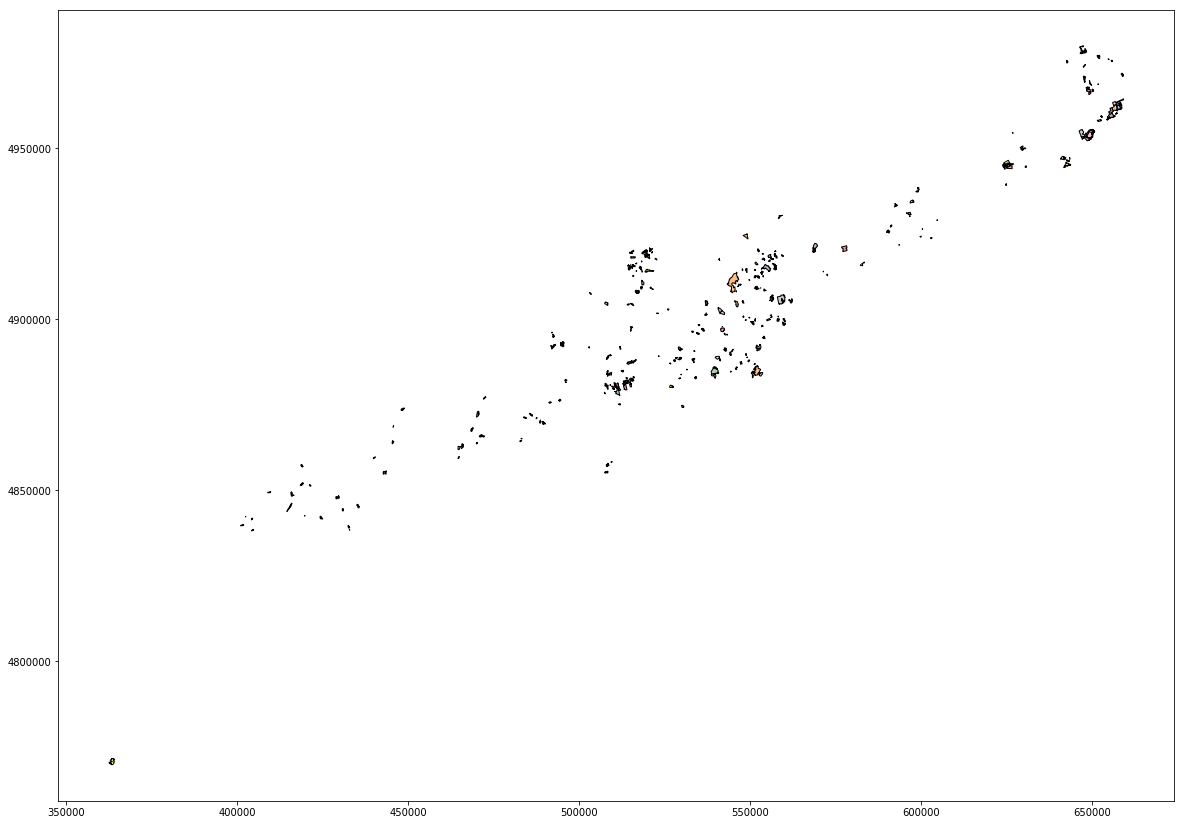

In [84]:
mcht['geometry'].plot(figsize=(20,20))

In [87]:
maine = gpd.read_file('/Users/kaitlincough/Documents/data_studio/data_studio_projects/shapefiles/maine_shapefile/Cnty24L.shp')

In [88]:
maine.head()

,FMNOTE,FMPROCSS,FMSRC,FMSRCDAT,FMSRCORG,FMUPDDAT,FMUPDORG,LAND,RTAC,SOURCE,Shape_len,TYPE,geometry
0,,put,,1995-06-01,megis,1996-01-01,megis,y,,17,12.384992,coastline,LINESTRING (658242.7501241006 4961404.99989812...
1,,closure,coast,1995-06-01,megis,1996-01-01,megis,y,,17,7.911707,coastline,LINESTRING (644393.7500430336 4961282.99996997...
2,,closure,coast,1995-06-01,megis,1996-01-01,megis,y,,17,33.630542,coastline,LINESTRING (518014.9063850269 4961068.00008972...
3,,dig,24k,1899-12-30,usgs,1899-12-30,,y,y,1,1598.581638,county,LINESTRING (542815.4999426138 4962621.00000044...
4,,put,coast,1995-06-01,megis,1996-01-01,megis,y,,17,43.908631,coastline,LINESTRING (657368.7499895524 4960609.00007427...


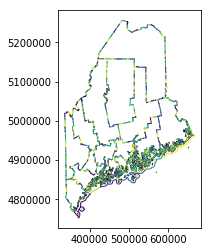

In [89]:
maine.plot()

In [95]:
# ax = maine.plot(figsize=(25,10), color='#A9A9A9')

# mcht.plot(figsize=(25,20),ax=ax)
# ax.axis('off')
# # ax.savefig('mchtonly.png')

In [96]:
type(joined)

geopandas.geodataframe.GeoDataFrame

(320099.03591404168, 683786.4326686518, 4727641.6496553496, 5281466.3500023857)

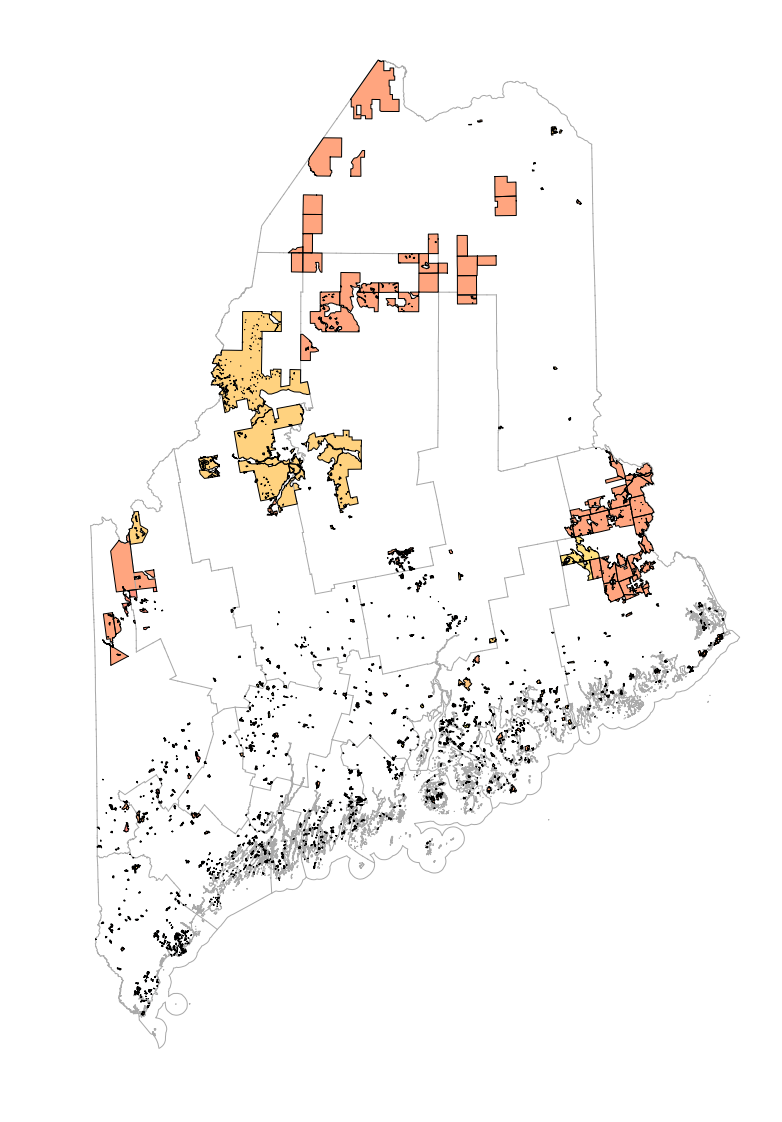

In [99]:
#plot the joined dataframe on top of the map of maine
#coloring by the name column, ie by the trust/govt entity that controls it
ax = maine.plot(figsize=(20,20), color='#A9A9A9')

joined.plot(column='name', cmap='autumn_r', figsize=(20,20), ax=ax)
ax.axis('off')